In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy
from random import uniform

coordinates = []

def newpoint():
   return uniform(-180,180), uniform(-90, 90)
points = (newpoint() for x in range(700))
for point in points:
   coordinates.append(point)

coordinates[695:700]

[(-165.5281899269275, -66.0588294617956),
 (-43.290900691967266, -54.95569258212436),
 (22.609219092575472, -71.06471413366518),
 (109.6074648791207, -61.08967356423743),
 (-136.6159001659038, 17.524282114652976)]

In [12]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

citynames = []    
for city in cities:
    country_code = city.country_code
    citynames.append(city.city_name)

print(cities[695:700])
print(citynames[695:700])

[<citipy.citipy.City object at 0x000001EB092A2898>, <citipy.citipy.City object at 0x000001EB0929C6A0>, <citipy.citipy.City object at 0x000001EB0AB12F28>, <citipy.citipy.City object at 0x000001EB09A0FBA8>, <citipy.citipy.City object at 0x000001EB0B038048>]
['ushuaia', 'mar del plata', 'cockburn town', 'qaanaaq', 'bredasdorp']


In [13]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
key = "1110f49e3759491bcb010ae484f17c23"
query_units = "imperial"

weather_data = []
row_count = 0

for names in citynames:
    query_url = base_url + "?apikey=" + key + "&q=" + names + "&units=" + query_units
    weather_data.append(req.get(query_url).json())
    
    print(query_url)
    row_count += 1

    
    try:
        name_data = [data.get("name") for data in weather_data]
        cloud_data = [data.get("clouds").get("all") for data in weather_data]
        country_data = [data.get("sys").get("country") for data in weather_data]
        date_data = [data.get("dt") for data in weather_data]
        humidity_data = [data.get("main").get("humidity") for data in weather_data]
        lat_data = [data.get("coord").get("lat") for data in weather_data]
        lon_data = [data.get("coord").get("lon") for data in weather_data]
        tempmax_data = [data.get("main").get("temp_max") for data in weather_data]
        wind_data = [data.get("wind").get("speed") for data in weather_data]

        weather_dataframe = {"City": name_data,
                         "Cloudiness": cloud_data,
                         "Country": country_data,
                         "Date": date_data,
                         "Humidity": humidity_data,
                         "Lat": lat_data,
                         "Lon": lon_data,
                         "Max Temp": tempmax_data,
                         "Wind Speed": wind_data}
        
    except:
        pass

weather_dataframe = pd.DataFrame(weather_dataframe)
weather_dataframe.to_csv('sample.csv')
weather_dataframe

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=port elizabeth&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=belushya guba&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=port alfred&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=taolanaro&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=medea&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=illoqqortoormiut&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=jamestown&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=taolanaro&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=azimur&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=belushya guba&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=albany&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=belushya guba&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=veisiejai&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=olafsvik&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=norrtalje&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=longyearbyen&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=jamestown&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=kattivakkam&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=illoqqortoormiut&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=hithadhoo&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=bredasdorp&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=punta arenas&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=punta arenas&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=misratah&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=u

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaqortoq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=longyearbyen&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=leshukonskoye&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=kayfan&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=bolgatanga&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=bredasdorp&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=illoqqortoormiut&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=henties bay&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=joensuu&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=port alfred&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=longyearbyen&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=belushya guba&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=narok&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae4

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=olafsvik&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=bridlington&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=saint-philippe&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=tumannyy&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=busselton&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=georgetown&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=taolanaro&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaanaaq&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=bredasdorp&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=mantua&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=port alfred&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ponta do sol&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ya

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=kaabong&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=hendaye&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=berlevag&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=port elizabeth&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=albany&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=longyearbyen&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=qaan

http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=anar darreh&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=east london&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=belushya guba&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=albany&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=dikson&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=rumonge&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=ushuaia&units=imperial
http://api.openweathermap.org/data/2.5/weather?apikey=1110f49e3759491bcb010ae484f17c23&q=upe

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Port Elizabeth,75,US,1514069760,87,39.31,-74.98,60.8,4.7


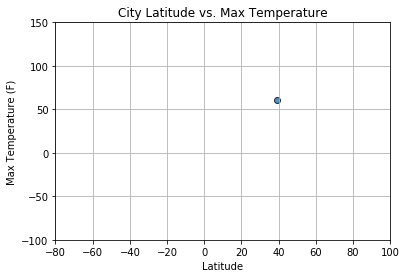

In [14]:
plt.scatter(weather_dataframe["Lat"].astype(int), 
            weather_dataframe["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])
plt.savefig("LatvsMaxTemp.png")

plt.show()

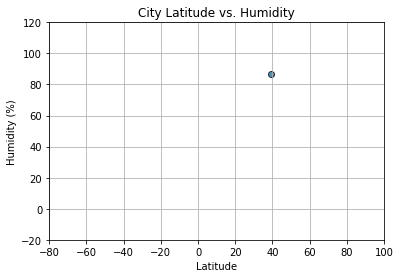

In [15]:
plt.scatter(weather_dataframe["Lat"].astype(int), 
            weather_dataframe["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])
plt.savefig("LatvsHumidity.png")

plt.show()

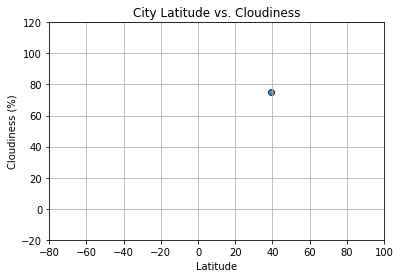

In [16]:
plt.scatter(weather_dataframe["Lat"].astype(int), 
            weather_dataframe["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])
plt.savefig("LatvsCloudiness.png")

plt.show()

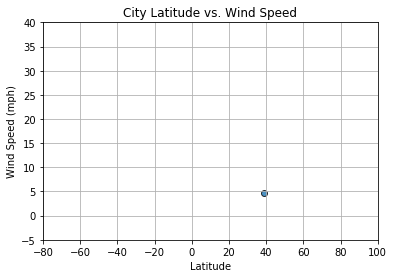

In [17]:
plt.scatter(weather_dataframe["Lat"].astype(int), 
            weather_dataframe["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])
plt.savefig("Latvsspeed.png")


plt.show()